# Word Embeddings to Study Gender and Ethnic Stereotypes in Popular American Film Dialogue

### Introduction

In their paper '[Word embeddings quantify 100 years of gender and ethnic stereotypes](https://www.pnas.org/doi/10.1073/pnas.1720347115),' authors Nikhil Garg, Londa Schiebinger, Dan Jurafsky, and James Zoue build a framework for measuring the "changes in stereotypes and attitudes toward women and ethnic minorities in the 20th and 21st centuries in the United States" using word embeddings or the relationship between words corresponding to gender or ethnic minorities and words associated with stereotypes or occupation."

Their research uses three existing corpora of word vectors:

1. [Google News, word2vec](https://code.google.com/archive/p/word2vec/)
2. [Genre-Balanced American English (1830s-2000s), SGNS and SVD](https://nlp.stanford.edu/projects/histwords/)
3. [Wikipedia, GloVe](https://nlp.stanford.edu/projects/glove/)

As well they have tools and utilites to build word vectors as they did for [The New York Times Annotated Corpus](https://catalog.ldc.upenn.edu/LDC2008T19).

They then collated several word lists to represent each gender (men, women) and ethnicity (White, Asian, and Hispanic), as well as neutral words (adjectives and occupations). Occupation data comes from [US Census Data](https://www.ipums.org/projects/ipums-usa/d010.v6.0) to extract the percentage of workers in each occupation that belong to each gender or ethnic group and compare it to the bias in the embeddings.

Using these data the authors were able to compare word embedding biases toward gender or ethnicity. For example we look at occupations held by women vs. men historically. Using word embeddings trained on large text corpora a ratio can be made between the relative word vector distances of the two genders to a particular occupation. If the vector distance between a gendered term (women, girls, mothers, nieces, etc) to an occupational term such as 'doctor' is larger for one gender vs. another then there is a bias toward a particular gender. The change in these distances in corpora of texts across time periods was produced as representation of the change in bias over time. This measured change in bias in the text was then compared to census data which shows the change in occupations held by men and women over time. The changes tended to correlate.

These studies were reproduced across various corpora of word vectors as well as measures of bias to confirm their validity. Using the utilities and word lists developed in this study I hope to answer whether we see similar evolving semantic relationships in occupation and adjective associations in a text corpora gleaned from the dialogue of popular American films.

### Critical reflection of the data

The authors' study has a [Github Repository](https://github.com/nikhgarg/EmbeddingDynamicStereotypes) from which data samples are included in the directory (data/final_project/study_data/). As requested they are cited as follows:

Garg, N., Schiebinger, L., Jurafsky, D. & Zou, J. Word embeddings quantify 100 years of gender and ethnic stereotypes. PNAS 201720347 (2018). doi:10.1073/pnas.1720347115

There are a number of data sources that deserve examination in the context of data feminism. Probably the most important principle of data feminism to consider is to "rethink binaries & hierarchies – data feminism requires us to challenge the gender binary, along with other systems of counting and classification that perpetuate opression."

Given the main objective of this study attempts to model changes in gender and ethnic stereotypes over time using large corpora of word vectors, the sources of gender and ethnic keyword models used should be considered closely. The authors admit that the scope of their study is limited to the binary genders of male and female, describing the limitation as 'technical.' There are two lists of words that are considered 'associated' with men and women ((fe)male_pairs.txt) and are used in companion with a gender based stereotype lists from a 1977 and 1990 study by Willams and Best (adjectives_williamsbest).

It is admirable that the authors are open with their description of their approach and how it was chosen, it's dissappointing that there is no proposed models, even if to be considered at a later date in order to consider a more pluralistic approach to gender. It would be interesting to engage non-bianary communities to discover how they would wish to approach generating an 'associated' word list. 

As well, the authors used a dataset (mturk_stereotypes.csv) created using a pool of US based participants on Amazon Mechanical Turk who were asked to score a list of occupations as having a gender 'lean.' They are again very direct in acknowledging the limitations of using such a pool, specifically that they are not necessarily 'representative of the US population.' Individuals on Mechanical Turk have concerning potential biases based on their context. For example, they may be completing dozens or more surveys as 'professional respondents.' There might be survey fatigue and as a result reducing the quality of the data. As well the context of the individual is location specific only (which can be cirumvented quite easily using VPN proxy servers), and additional demographic and personal context that may influence ideas of stereotypes is not available for consideration.

Similarly the study recognizes their limitations in studying ethnicity describing how common names lists for studied categories – Asian, White, Hispanic – presupposes that differentiating names as 'White' vs. 'Black' is not possible due to the tremendous amount of overlap in naming. And as such the same two names lists are used for the two races (names_black(white).txt). The usuage of surnames alone and a list of twenty names for each category is probably due additional technical limitations, corpa of common names abstracted from census data might be a possible solution if accessible. As well the sample sizes might be varied.

Stereotype data for ethnic categories was gleaned from a set of Princeton studies from 1933, 1951, and 1969. The authors describe how the Princeton studies (princeton_stereotypes.csv) are one of the few historical sources of data on stereotypes. At the time of each study, undergraduate students of Princeton were surveyed on their attitudes toward 10 ethnic groups using adjectives, a strength measure, and a true/false. The Princeton data is incredibly problematic given that the undergraduates of the time were most certainly almost all white, wealthy, and male given the university was not officially coeducation until 1969.

### SRT DATA

Movie subtitles files are publicly available for most American films in English having been created through a crowdsourcing process. Individuals generate 'SRT' files – text files which contain structured timecode data and dialogue text – through a variety of automated and by-hand processes. Most files are then published to [OpenSubtitles.org](https://www.opensubtitles.org/) which hosts subtitle files for films in dozens of different languages. Issues of concern include irregular structure of text file syntax to indictate 'sounds-on-tape' – music, sound effect description, etc. versus dialogue texts. As well there is a bias toward only the most popular films in American history and the populations that consume them which skews the available set of SRT files. This will likely also be the case for film lists found on Wikipedia which skew toward the popular as well.

Using the Open Subtitle API and film list data crawled from Wikipedia entries, SRT files may be automatically downloaded and subsequently processed as was done in my brief study [Investigating Dialogue in Top Ten American Films](https://github.com/mbransons/vocab_in_film_dialogue). There is some potential to avoid using this combersome process and work with a [corpus of Open Subtitle data](https://opus.nlpl.eu/OpenSubtitles-v2018.php) created in 2016 by researchers Pierre Lison and Jorg Tiedemann as presented in their paper [OpenSubtitles2016: Extracting Large Parallel Corpora from Movie and TV Subtitles](http://www.lrec-conf.org/proceedings/lrec2016/pdf/947_Paper.pdf). Limitations of this dataset needs to be studied.

For this study 887 SRT files where gathered based on Wikipedia lists of top American films from the years 1927 to 2022 (data/final_project/srts). For each file the timecode data, sound effect references, and line return strings were removed. The resulting strings of text for each film were combined by decade, creating eleven text files with the text of all films in the particular decade (data/final_project/film_decade_txt). The code for this particular process can be found in ./film_data.ipynb.

The plan to use the Word Embeddings toolset from the analyzed study has been challenging. I've successfully created the vector files for each decade using the [GloVe word vector algorithm](https://github.com/stanfordnlp/GloVe). As well I was able to use the study's tools for normalizing vectors (normailze_vectors.ipynb). So effectively I've been able to create Word Embeddings for each of the decades of SRT text. I'm at the moment stuck in my efforts to run the python code at the bottom of this notebook which comes from the 'changes_over_time.py' file from the authors study. It's almost 300 lines of python and I'm still looking to see how to simply the functions described given I'm looking at a simplified version of the study.

But to get a sense of the quality of the embeddings I've created a basic analysis immediately below.

In [4]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [5]:
emmbed_dict = {}
with open('./data/final_project/vectors/normalized_clean/vectors-1980.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [6]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [12]:
find_similar_word(emmbed_dict['vehicle'])[0:10]

['vehicle',
 'opportunity',
 'contest',
 'comic',
 'cap',
 'relatively',
 'lunatic',
 'psychological',
 'scenario',
 'childs']

In [9]:
find_similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])[0:10]

['prince',
 'king',
 'martial',
 'gozer',
 'respected',
 'minister',
 'historical',
 'symbol',
 'sexual',
 'canadian']

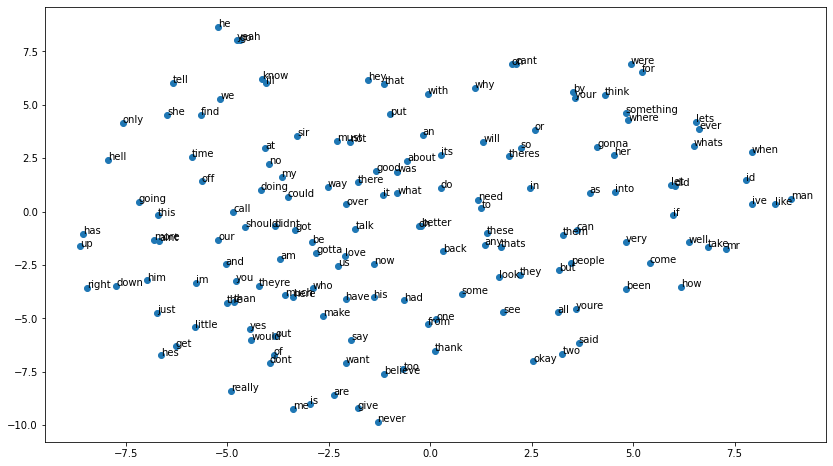

In [10]:
distri = TSNE(n_components=2)
words = list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

### Analysis

It's clear that despite my issues running the remaining aspects of the code from the authors, the embeddings created for this example study are working from too small a corpora of text. Seeing similar word searches for 'vehicle' and the combination of 'king' and 'queen' do not return particularly good resulting synonyms. This likely means that a lot more SRT files from each decade will be needed to determine if better results are possible. Also there is the concern that dialogue itself is a limited source for this type of text analysis due to the likely fact that the range of vocabulary used when speaking is much smaller that in the written form. The author's sources of text were only from books, Wikipedia, and newspaper articles which surely have larger working vocabularies.


### Reflection on ethical approaches to answering the research question

The authors were successful in the creation of a text based model for measuring changes in bias and affirming that their model tracks with societal changes measured in other data sources. My models were not able to reproduce their results given my limited technical skills as well as the concerns with the size of the corpora produced from the number of SRT files used.

The datasets used to innumerate and define the constructs of gender and ethnicity though are of great concern. A process that is inclusive of affected communities should be engaged to define measures of non-binary gender classification and how it might be employed. Of equal concern is the usage of data measuring stereotypes, in particular the Princeton data which has a tremendous amount of bias built into it.

### Python code to still sort out

Below is where I'm presently stuck as I'm trying to use the movie decade word embeddings with the comparisons to word lists from the sample data.

In [2]:
from io import StringIO
import csv
import numpy as np
import sys
# from cStringIO import StringIO
import copy
import datetime

def cossim(v1, v2, signed = True):
    c = np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
    if not signed:
        return abs(c)
    return c

def calc_distance_between_vectors(vec1, vec2, distype = 'norm'):
    if distype is 'norm':
        return np.linalg.norm(np.subtract(vec1, vec2))
    else:
        return cossim(vec1, vec2)

def calc_distance_between_words(vectors, word1, word2, distype = 'norm'):
        if word1 in vectors and word2 in vectors:
            if distype is 'norm':
                return np.linalg.norm(np.subtract(vectors[word1], vectors[word2]))
            else:
                return cossim(vectors[word1], vectors[word2])
        return np.nan
def calc_distance_over_time(vectors_over_time, word1, word2, distype = 'norm', vocabd = None, word1lims = [50, 1e25], word2lims = [50, 1e25]):
    ret = []
    for en,vectors in enumerate(vectors_over_time):
        if vocabd is None or vocabd[en] is None:
            ret.append(calc_distance_between_words(vectors, word1, word2, distype))
        elif (vocabd is not None and vocabd[en] is not None and (word1 in vocabd[en] and word2 in vocabd[en])):
            if (vocabd[en][word1] < word1lims[0] or vocabd[en][word2] < word2lims[0] or vocabd[en][word1] > word1lims[1] or vocabd[en][word2] > word2lims[1]):
                ret.append(np.nan)
            else:
                ret.append(calc_distance_between_words(vectors, word1, word2, distype))
        else:
            ret.append(calc_distance_between_words(vectors, word1, word2, distype))

    return ret

def calc_distance_over_time_averagevectorsfirst(vectors_over_time, words_to_average_1, words_to_average_2, distype = 'norm', vocabd = None, word1lims = [50, 1e25], word2lims = [50, 1e25]):
    retbothaveraged = []
    retfirstaveraged = []
    retsecondaveraged = []

    for en,vectors in enumerate(vectors_over_time):
        validwords1 = []
        validwords2 = []
        for word in words_to_average_1:
            if vocabd is not None and vocabd[en] is not None and word in vocabd[en] and word in vectors_over_time[en]:
                if vocabd[en][word] < word1lims[0] or vocabd[en][word] > word1lims[1]: continue
                validwords1.append(word)
            elif (vocabd is None or vocabd[en] is None) and word in vectors_over_time[en]:
                validwords1.append(word)


        for word in words_to_average_2:
            if vocabd is not None and vocabd[en] is not None and word in vocabd[en] and word in vectors_over_time[en]:
                if vocabd[en][word] < word2lims[0] or vocabd[en][word] > word2lims[1]: continue
                validwords2.append(word)
            elif (vocabd is None or vocabd[en] is None) and word in vectors_over_time[en]:
                validwords2.append(word)
        #if lengths of the valids are 0, distance is nan
        if len(validwords1) == 0 or len(validwords2) == 0:
            retbothaveraged.append(np.nan)
            retfirstaveraged.append(np.nan)
            retsecondaveraged.append(np.nan)
        else:
            average_vector_1 = np.mean(np.array([vectors[word] for word in validwords1]), axis = 0)
            average_vector_2 = np.mean(np.array([vectors[word] for word in validwords2]), axis = 0)

            retbothaveraged.append(calc_distance_between_vectors(average_vector_1,average_vector_2, distype))
            retfirstaveraged.append(np.mean([calc_distance_between_vectors(average_vector_1,vectors[word], distype) for word in validwords2]))
            retsecondaveraged.append(np.mean([calc_distance_between_vectors(vectors[word], average_vector_2, distype) for word in validwords1]))

    return retbothaveraged, retfirstaveraged, retsecondaveraged

def load_vectors(filename):
    print(filename)
    vectors = {}
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter = ' ')
        for row in reader:
            vectors[row[0]] = [float(x) for x in row[1:] if len(x) >0]
    return vectors

def load_vectors_over_time(filenames):
    vectors_over_time = []
    for f in filenames:
        vectors_over_time.append(load_vectors(f))
    return vectors_over_time

def single_set_distances_to_single_set(vectors_mult, targetset, otherset, vocabd, word1lims = [50, 1e25], word2lims = [50, 1e25]):
    '''
    returns average distances of targetset to single set over the vectors_mult

    also returns averages done in different way -- average targetset vectors before distancce to each, average
        otherset before each, AND average both and return a single value
    '''
    toset = [[] for _ in range(len(vectors_mult))]
    toset_cossim = [[] for _ in range(len(vectors_mult))]

    toset_averageothersetfirst = [[] for _ in range(len(vectors_mult))]
    toset_cossim_averageothersetfirst = [[] for _ in range(len(vectors_mult))]

    toset_averagetargetsetfirst = [[] for _ in range(len(vectors_mult))]
    toset_cossim_averagetargetsetfirst = [[] for _ in range(len(vectors_mult))]

    for word in targetset:
        for word2 in otherset:
            dists = calc_distance_over_time(vectors_mult, word, word2, vocabd = vocabd, word1lims = word1lims, word2lims = word2lims)
            dists_cossim = calc_distance_over_time(vectors_mult, word, word2, distype = 'cossim', vocabd = vocabd, word1lims = word1lims, word2lims = word2lims)
            # print(dists)
            for en,d in enumerate(dists):
                if not np.isnan(d):
                    toset[en].append(d)
                    toset_cossim[en].append(dists_cossim[en])
    # print [len(d) for d in toset]

    toset = [np.mean(d) for d in toset]
    toset_cossim = [np.mean(d) for d in toset_cossim]

    averageboth, averagefirst, averagesecond = calc_distance_over_time_averagevectorsfirst(vectors_mult, targetset, otherset, distype = 'norm', vocabd = vocabd, word1lims = word1lims, word2lims = word2lims)

    averageboth_cossim, averagefirst_cossim, averagesecond_cossim = calc_distance_over_time_averagevectorsfirst(vectors_mult, targetset, otherset, distype = 'cossim', vocabd = vocabd, word1lims = word1lims, word2lims = word2lims)

    return [toset, toset_cossim, averageboth, averagefirst, averagesecond, averageboth_cossim, averagefirst_cossim, averagesecond_cossim]

def set_distances_to_set(vectors_mult, targetset, set0, set1, vocabd, word1lims = [50, 1e25], word2lims = [50, 1e25]):
    '''
    returns average distances of targetset to each of set0 and set1 over the vectors_mult
    '''
    toset0 = [[] for _ in range(len(vectors_mult))]
    toset1 = [[] for _ in range(len(vectors_mult))]
    toset0_cossim = [[] for _ in range(len(vectors_mult))]
    toset1_cossim = [[] for _ in range(len(vectors_mult))]
    for word in targetset:
        for word2 in set0:
            dists = calc_distance_over_time(vectors_mult, word, word2, vocabd= vocabd, word1lims = word1lims, word2lims = word2lims )
            dists_cossim = calc_distance_over_time(vectors_mult, word, word2, distype = 'cossim', vocabd = vocabd, word1lims = word1lims, word2lims = word2lims )
            # print(dists)
            for en,d in enumerate(dists):
                if not np.isnan(d):
                    toset0[en].append(d)
                    toset0_cossim[en].append(dists_cossim[en])

        for word2 in set1:
            dists = calc_distance_over_time(vectors_mult, word, word2,vocabd= vocabd , word1lims = word1lims, word2lims = word2lims)
            dists_cossim = calc_distance_over_time(vectors_mult, word, word2, distype = 'cossim', vocabd= vocabd, word1lims = word1lims, word2lims = word2lims )
            # print(dists)
            for en,d in enumerate(dists):
                if not np.isnan(d):
                    toset1[en].append(d)
                    toset1_cossim[en].append(dists_cossim[en])
    toset0 = [np.mean(d) for d in toset0]
    toset1 = [np.mean(d) for d in toset1]
    toset0_cossim = [np.mean(d) for d in toset0_cossim]
    toset1_cossim = [np.mean(d) for d in toset1_cossim]
    return [toset0, toset0_cossim], [toset1, toset1_cossim]

def load_vocab(fi):
    try:
        with open(fi, 'r') as f:
            reader = csv.reader(f, delimiter = ' ')
            return {d[0]:float(d[1]) for d in reader}
    except:
        return None

def get_counts_dictionary(vocabd, neutwords):
    dwords = {}
    if vocabd is None or len(vocabd) == 0: return {}
    for en in range(len(vocabd)):
        if vocabd[en] is None: return {}
    for word in neutwords:
        dwords[word] = [vocabd[en].get(word, 0) for en in range(len(vocabd))]
    return dwords

def get_vector_variance(vectors_over_time, words, vocabd = None, word1lims = [50, 1e25], word2lims = [50, 1e25]):

    variances = []
    for en,vectors in enumerate(vectors_over_time):
        validwords = []
        for word in words:
            if vocabd is not None and vocabd[en] is not None and word in vocabd[en] and word in vectors_over_time[en]:
                if vocabd[en][word] < word1lims[0] or vocabd[en][word] > word1lims[1]: continue
                validwords.append(word)
            elif (vocabd is None or vocabd[en] is None) and word in vectors_over_time[en]:
                validwords.append(word)

        #if lengths of the valids are 0, variances are nan
        if len(validwords) == 0:
            variances.append(np.nan)
        else:
            avgvar = np.mean(np.var(np.array([vectors[word] for word in validwords]), axis = 0))
            variances.append(avgvar)

    return variances

def main(filenames, label, csvname = None, neutral_lists = [], group_lists = ['male_pairs', 'female_pairs'], do_individual_group_words = False, do_individual_neutral_words = False, do_cross_individual = False):

    vocabs = [fi.replace('vectors/normalized_clean/vectors', 'vectors/normalized_clean/vocab/vocab') for fi in filenames]
    vocabd = [load_vocab(fi) for fi in vocabs]

    d = {}
    vectors_over_time = load_vectors_over_time(filenames)
    print('vocab size: ' + str([len(v.keys()) for v in vectors_over_time]))
    d['counts_all'] = {}
    d['variance_over_time'] = {}

    for grouplist in group_lists:
        with open('data/'+grouplist + '.txt', 'r') as f2:
            groupwords = [x.strip() for x in list(f2)]
            d['counts_all'][grouplist] = get_counts_dictionary(vocabd, groupwords)
            d['variance_over_time'][grouplist] = get_vector_variance(vectors_over_time, groupwords)

    for neuten, neut in enumerate(neutral_lists):
        with open('data/'+neut + '.txt', 'r') as f:
            neutwords = [x.strip() for x in list(f)]

            d['counts_all'][neut] = get_counts_dictionary(vocabd, neutwords)
            d['variance_over_time'][neut] = get_vector_variance(vectors_over_time, neutwords)

            dloc_neutral = {}

            for grouplist in group_lists:
                with open('data/'+grouplist + '.txt', 'r') as f2:
                    print(neut, grouplist)
                    groupwords = [x.strip() for x in list(f2)]
                    distances = single_set_distances_to_single_set(vectors_over_time, neutwords, groupwords, vocabd)

                    d[neut+'_'+grouplist] = distances

                    if do_individual_neutral_words:
                        for word in neutwords:
                            dloc_neutral[word] = dloc_neutral.get(word, {})
                            dloc_neutral[word][grouplist] = single_set_distances_to_single_set(vectors_over_time, [word], groupwords, vocabd)
                    if do_individual_group_words:
                        d_group_so_far = d.get('indiv_distances_group_'+grouplist, {})
                        for word in grouplist:
                            d_group_so_far[word] = d_group_so_far.get(word, {})
                            d_group_so_far[word][neut] = single_set_distances_to_single_set(vectors_over_time, neutwords,[word], vocabd)
                        d['indiv_distances_group_'+grouplist] = d_group_so_far

                    if do_cross_individual:
                        d_cross = {}
                        for word in groupwords:
                            d_cross[word] = {}
                            for neutword in neutwords:
                                d_cross[word][neutword] = single_set_distances_to_single_set(vectors_over_time, [neutword],[word], vocabd)
                        d['indiv_distances_cross_'+grouplist+'_'+neut] = d_cross


            d['indiv_distances_neutral_'+neut] = dloc_neutral

    with open('run_results/'+csvname, 'ab') as cf:
        headerorder = ['datetime', 'label']
        headerorder.extend(sorted(list(d.keys())))
        print(headerorder)
        d['label'] = label
        d['datetime'] = datetime.datetime.now()

        csvwriter = csv.DictWriter(cf, fieldnames = headerorder)
        csvwriter.writeheader()
        csvwriter.writerow(d)
        cf.flush()

folder = './data/final_project/vectors/normalized_clean'

# filenames_nyt = [folder + 'vectorsnyt{}-{}.txt'.format(x, x+3) for x in range(1987, 2005, 1)]
filenames_movie_decades = [folder + 'vectors–{}.txt'.format(x) for x in range(1920, 2020, 10)]
# filenames_svd = [folder + 'vectors_svd{}.txt'.format(x) for x in range(1910, 2000, 10)]
# filenames_google = [folder + 'vectorsGoogleNews_exactclean.txt']
# filenames_wikipedia = [folder + 'vectorswikipedia.txt']
# filenames_commoncrawl = [folder + 'vectorscommoncrawlglove.txt']

filename_map = {'movies' : filenames_movie_decades}

if __name__ == "__main__":
    param_filename = 'run_params.csv'

    with open(param_filename,'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            label = row['label']
            neutral_lists = eval(row['neutral_lists'])
            group_lists = eval(row['group_lists'])
            do_individual_neutral_words = (row['do_individual_neutral_words'] == "TRUE")
            do_individual_group_words = (row.get('do_individual_neutral_words', '') == "TRUE")

            main(filename_map[label], label = label, csvname = row['csvname'], neutral_lists = neutral_lists, group_lists = group_lists, do_individual_neutral_words = do_individual_neutral_words, do_individual_group_words = do_individual_group_words)


./data/final_project/vectors/normalized_cleanvectors–1920.txt


<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/n3/7lr2xtgs72g16rs2rfk0gvgw0000gn/T/ipykernel_66213/1699109856.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if distype is 'norm':
/var/folders/n3/7lr2xtgs72g16rs2rfk0gvgw0000gn/T/ipykernel_66213/1699109856.py:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if distype is 'norm':


FileNotFoundError: [Errno 2] No such file or directory: './data/final_project/vectors/normalized_cleanvectors–1920.txt'